<a href="https://colab.research.google.com/github/kugmax/tensorflow_learn/blob/master/Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
tf.enable_eager_execution()

In [0]:
x = tf.zeros([10, 10])
x += 2
print(x)
print(x.shape)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)
(10, 10)


In [0]:
v = tf.Variable(1.0)
print(v == 1.0)
print(v.numpy() == 1.0)
print(v)
print(v.numpy())

False
True
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>
1.0


In [0]:
class Model(object):
  def __init__(self):
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)
    
  def __call__(self, x):
    return self.W * x + self.b
  
model = Model()  

print(model(3.0).numpy() == 15.0) 

True


In [0]:
def loss(predictd_y, desired_y):
  return tf.reduce_mean( tf.square(predictd_y - desired_y) )

In [0]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLE = 1000

inputs = tf.random_normal(shape=[NUM_EXAMPLE])
noise = tf.random_normal(shape=[NUM_EXAMPLE])
outputs = inputs * TRUE_W + TRUE_b + noise

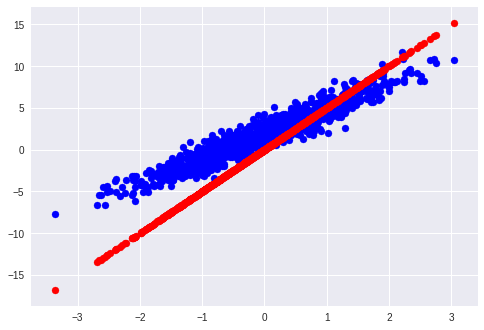

Current loss: 
8.938043


In [0]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')

plt.show()
print('Current loss: ')
print(loss(model(inputs), outputs).numpy())

In [0]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.93804
Epoch  1: W=3.96 b=0.98, loss=2.83765
Epoch  2: W=3.46 b=1.47, loss=1.38467
Epoch  3: W=3.22 b=1.71, loss=1.03796
Epoch  4: W=3.10 b=1.83, loss=0.95507
Epoch  5: W=3.05 b=1.90, loss=0.93522
Epoch  6: W=3.02 b=1.93, loss=0.93045
Epoch  7: W=3.01 b=1.94, loss=0.92931
Epoch  8: W=3.01 b=1.95, loss=0.92903
Epoch  9: W=3.00 b=1.95, loss=0.92896


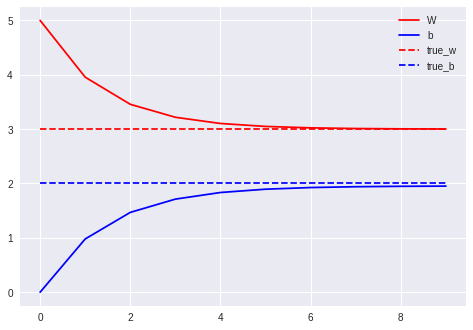

In [0]:
model = Model()
Ws, bs = [], []
epochs = range(10)

for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)
  
  train(model, inputs, outputs, learning_rate = 0.25)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' 
        % (epoch, Ws[-1], bs[-1], current_loss ))
      
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
           [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true_w', 'true_b'])
plt.show()

In [0]:
# Custom layers

In [0]:
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, num_outputs):
    super(MyDenseLayer, self).__init__()
    self.num_outputs = num_outputs
    
  def build(self, input_shape):
    self.kernel = self.add_variable("kernel", 
                                    shape= [int(input_shape[-1]), 
                                            self.num_outputs]
                                   )
  def call(self, input):
    return tf.matmul(input, self.kernel)
  
  
layer = MyDenseLayer(10)

print(layer(tf.zeros([10, 5])))
print(layer.variables)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
[<tf.Variable 'my_dense_layer_3/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-2.9230899e-01,  3.5404295e-01,  4.4773620e-01, -2.8072339e-01,
         3.5690308e-02, -1.8938243e-01, -8.4578216e-02, -1.5376753e-01,
         1.0771352e-01,  2.3322272e-01],
       [-3.7067518e-01, -5.4549253e-01, -1.6326198e-01,  1.4559537e-01,
         5.7696050e-01, -3.1457254e-01, -5.7345688e-01,  2.1465600e-02,
         1.4600933e-02,  8.2926512e-02],
       [ 5.9266132e-01,  2.3407286e-01,  1.5621001e-01,  2.5949484e-01,
         1.6292572e-01,  2.1289271e-01,  4.1357797e-01,  1.1811781e-01,
         5.6842983e-02,  4.1632670

In [0]:
class ResnetIdentityBlock(tf.keras.Model):
  def __init__(self, kernel_size, filters):
    super(ResnetIdentityBlock, self).__init__(name='')
    filters1, filters2, filters3 = filters
    
    self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
    self.bn2a = tf.keras.layers.BatchNormalization()
    
    self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn2b = tf.keras.layers.BatchNormalization()
    
    self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn2c = tf.keras.layers.BatchNormalization()
    
  def call(self, input_tensor, training=False):
    x = self.conv2a(input_tensor)
    x = self.bn2a(x, training=training)
    x = tf.nn.relu(x)
    
    x = self.conv2b(x)
    x = self.bn2b(x, training=training)
    x = tf.nn.relu(x)
    
    x = self.conv2c(x)
    x = self.bn2c(x, training=training)
    
    x += input_tensor
    return tf.nn.relu(x)
  
block = ResnetIdentityBlock(1, [1, 2, 3])
print(block(tf.zeros([1, 2, 3, 3]) ))
print([x.name for x in block.variables])

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 2, 3, 3), dtype=float32)
['resnet_identity_block_1/conv2d_1/kernel:0', 'resnet_identity_block_1/conv2d_1/bias:0', 'resnet_identity_block_1/batch_normalization/gamma:0', 'resnet_identity_block_1/batch_normalization/beta:0', 'resnet_identity_block_1/conv2d_2/kernel:0', 'resnet_identity_block_1/conv2d_2/bias:0', 'resnet_identity_block_1/batch_normalization_1/gamma:0', 'resnet_identity_block_1/batch_normalization_1/beta:0', 'resnet_identity_block_1/conv2d_3/kernel:0', 'resnet_identity_block_1/conv2d_3/bias:0', 'resnet_identity_block_1/batch_normalization_2/gamma:0', 'resnet_identity_block_1/batch_normalization_2/beta:0', 'resnet_identity_block_1/batch_normalization/moving_mean:0', 'resnet_identity_block_1/batch_normalization/moving_variance:0', 'resnet_identity_block_1/batch_normalization_1/moving_mean:0', 'resnet_identity_block_1/batch_normalization_1/moving_variance:0', 'resnet_

In [0]:

my_seq = tf.keras.Sequential([
    tf.keras.layers.Conv2D(1, (1, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(2, 1, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(3, (1, 1)),
    tf.keras.layers.BatchNormalization()
])
my_seq(tf.zeros([1, 2, 3, 3]))
#print([x.name for x in block.variables])

<tf.Tensor: id=486, shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

# Custom training: walkthrough

In [0]:
!pip install -q tf-nightly

In [0]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt
import tensorflow as tf

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))


TensorFlow version: 1.13.0-dev20181221
Eager execution: True


In [0]:
train_dataset_url = "http://download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                          origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


In [0]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [0]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [0]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [0]:
batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use `tf.data.experimental.make_csv_dataset(...)`.


In [0]:
features, labels = next(iter(train_dataset))

In [0]:
features

OrderedDict([('sepal_length',
              <tf.Tensor: id=67, shape=(32,), dtype=float32, numpy=
              array([5. , 5.7, 6.3, 5.1, 5. , 6.5, 4.5, 6.5, 6. , 6.5, 5.1, 6.9, 5.6,
                     6.1, 5.5, 7.9, 4.7, 5.6, 6.3, 5.8, 4.4, 4.9, 7.6, 7.7, 6.1, 4.8,
                     6.2, 5. , 6.8, 6.7, 5. , 7.7], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=68, shape=(32,), dtype=float32, numpy=
              array([3.5, 3. , 2.3, 3.8, 2. , 3. , 2.3, 2.8, 2.9, 3. , 3.8, 3.2, 2.5,
                     2.9, 2.4, 3.8, 3.2, 2.9, 3.4, 2.7, 2.9, 2.4, 3. , 3. , 2.8, 3.4,
                     3.4, 3.2, 3.2, 3.3, 3. , 3.8], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=65, shape=(32,), dtype=float32, numpy=
              array([1.6, 4.2, 4.4, 1.9, 3.5, 5.5, 1.3, 4.6, 4.5, 5.8, 1.5, 5.7, 3.9,
                     4.7, 3.7, 6.4, 1.3, 3.6, 5.6, 4.1, 1.4, 3.3, 6.6, 6.1, 4.7, 1.6,
                     5.4, 1.2, 5.9, 5.7, 1.6, 6.7],

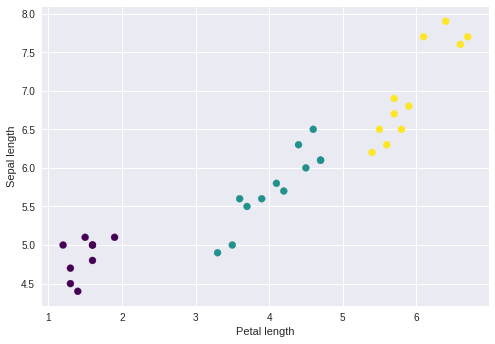

In [0]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel('Petal length');
plt.ylabel('Sepal length');

In [0]:
def pack_features_vector(features, labels):
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [0]:
train_dataset = train_dataset.map(pack_features_vector)

In [0]:
features, labels = next(iter(train_dataset))
print(features[:5])

tf.Tensor(
[[5.  3.5 1.6 0.6]
 [5.7 3.  4.2 1.2]
 [6.3 2.3 4.4 1.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]], shape=(5, 4), dtype=float32)


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4, )),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [0]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=218, shape=(5, 3), dtype=float32, numpy=
array([[ 0.8893151 , -0.5055454 ,  2.5295455 ],
       [ 0.9967212 , -0.02033699,  3.1340244 ],
       [ 1.2481977 ,  0.22266865,  3.0803175 ],
       [ 0.94487166, -0.56356364,  2.7594275 ],
       [ 0.97378576,  0.13587475,  2.5058517 ]], dtype=float32)>

In [0]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=224, shape=(5, 3), dtype=float32, numpy=
array([[0.15614693, 0.03870377, 0.8051494 ],
       [0.10164457, 0.0367605 , 0.8615949 ],
       [0.13147996, 0.04714959, 0.8213705 ],
       [0.13587685, 0.03006356, 0.8340596 ],
       [0.16500722, 0.07138431, 0.76360846]], dtype=float32)>

In [0]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
    Labels: [0 1 1 0 1 2 0 1 1 2 0 2 1 1 1 2 0 1 2 1 0 1 2 2 1 0 2 0 2 2 0 2]


In [0]:
def loss(model, x, y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

l = loss(model, features, labels)
print("Loss test {}".format(l))

Loss test 1.6755694150924683


In [0]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
global_step = tf.Variable(0)

In [0]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(global_step.numpy(),
                                         loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.variables), global_step)

print("Step: {},         Loss: {}".format(global_step.numpy(),
                                         loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 1.6755694150924683
Step: 1,         Loss: 1.24763023853302


In [0]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  #epoch_loss_avg = tf.metrics.mean
  #epoch_accuracy = tf.metrics.accuracy
  
  epoch_loss_avg = tf.contrib.eager.metrics.Mean()
  epoch_accuracy = tf.contrib.eager.metrics.Accuracy()
  
  for x, y in train_dataset:
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.variables),
                             global_step)
    
    epoch_loss_avg(loss_value)
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)
    
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())
  
  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()
    ))

Epoch 000: Loss: 0.979, Accuracy: 37.500%
Epoch 050: Loss: 0.369, Accuracy: 94.167%
Epoch 100: Loss: 0.223, Accuracy: 96.667%
Epoch 150: Loss: 0.157, Accuracy: 96.667%
Epoch 200: Loss: 0.124, Accuracy: 97.500%


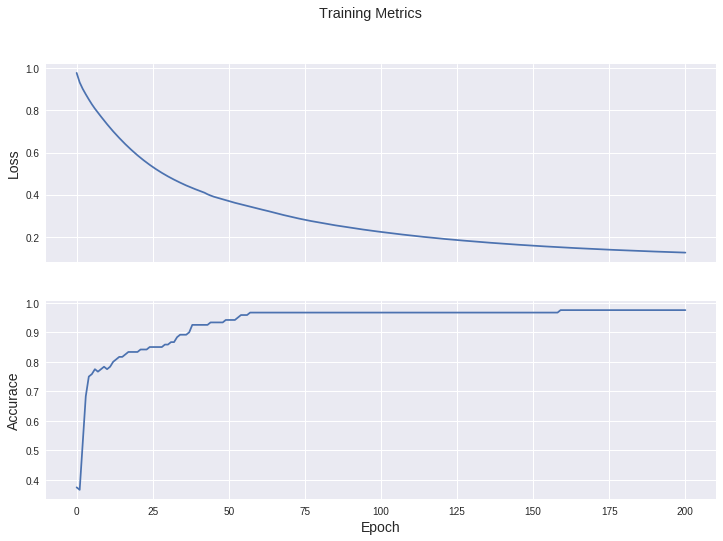

In [0]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accurace", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

In [0]:
test_url = "http://download.tensorflow.org/data/iris_test.csv"
test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [0]:
test_dataset = tf.contrib.data.make_csv_dataset(
    test_fp,
    batch_size, 
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [0]:
next(iter(test_dataset))

(<tf.Tensor: id=106478, shape=(30, 4), dtype=float32, numpy=
 array([[5.9, 3. , 4.2, 1.5],
        [6.9, 3.1, 5.4, 2.1],
        [5.1, 3.3, 1.7, 0.5],
        [6. , 3.4, 4.5, 1.6],
        [5.5, 2.5, 4. , 1.3],
        [6.2, 2.9, 4.3, 1.3],
        [5.5, 4.2, 1.4, 0.2],
        [6.3, 2.8, 5.1, 1.5],
        [5.6, 3. , 4.1, 1.3],
        [6.7, 2.5, 5.8, 1.8],
        [7.1, 3. , 5.9, 2.1],
        [4.3, 3. , 1.1, 0.1],
        [5.6, 2.8, 4.9, 2. ],
        [5.5, 2.3, 4. , 1.3],
        [6. , 2.2, 4. , 1. ],
        [5.1, 3.5, 1.4, 0.2],
        [5.7, 2.6, 3.5, 1. ],
        [4.8, 3.4, 1.9, 0.2],
        [5.1, 3.4, 1.5, 0.2],
        [5.7, 2.5, 5. , 2. ],
        [5.4, 3.4, 1.7, 0.2],
        [5.6, 3. , 4.5, 1.5],
        [6.3, 2.9, 5.6, 1.8],
        [6.3, 2.5, 4.9, 1.5],
        [5.8, 2.7, 3.9, 1.2],
        [6.1, 3. , 4.6, 1.4],
        [5.2, 4.1, 1.5, 0.1],
        [6.7, 3.1, 4.7, 1.5],
        [6.7, 3.3, 5.7, 2.5],
        [6.4, 2.9, 4.3, 1.3]], dtype=float32)>,
 <tf.Tensor: id=10647

In [0]:
test_accuracy = tf.contrib.eager.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))


Test set accuracy: 93.333%


In [0]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: id=106482, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 2],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [0]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (98.1%)
Example 1 prediction: Iris versicolor (82.0%)
Example 2 prediction: Iris virginica (88.5%)


# Model with Estimators

In [0]:
import tensorflow as tf
import tensorflow.feature_column as fc 

import os
import sys

import matplotlib.pyplot as plt
from IPython.display import clear_output

In [0]:
tf.enable_eager_execution()

In [0]:
! pip install -q requests

In [4]:
! git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2965, done.
remote: Counting objects: 100% (2965/2965), done.
remote: Compressing objects: 100% (2492/2492), done.
remote: Total 2965 (delta 523), reused 2081 (delta 399), pack-reused 0
Receiving objects: 100% (2965/2965), 369.09 MiB | 29.33 MiB/s, done.
Resolving deltas: 100% (523/523), done.
Checking out files: 100% (2798/2798), done.


In [0]:
models_path = os.path.join(os.getcwd(), 'models')

In [0]:
sys.path.append(models_path)


In [0]:
from official.wide_deep import census_dataset
from official.wide_deep import census_main

census_dataset.download("/tmp/census_data/")

In [0]:
if "PYTHONPATH" in os.environ:
  os.environ['PYTHONPATH'] += os.pathsep +  models_path
else:
  os.environ['PYTHONPATH'] = models_path

In [9]:
!python -m official.wide_deep.census_main --help

2018-12-21 15:16:28.500240: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2018-12-21 15:16:28.514565: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2018-12-21 15:16:28.514997: I tensorflow/compiler/xla/service/service.cc:161] XLA service 0x4d63ee0 executing computations on platform Host. Devices:
2018-12-21 15:16:28.515038: I tensorflow/compiler/xla/service/service.cc:168]   StreamExecutor device (0): <undefined>, <undefined>
Train DNN on census income dataset.
flags:

/content/models/official/wide_deep/census_main.py:
  -bs,--batch_size:
    Batch size for training and evaluation. When using multiple gpus, this is
    the
    global batch size for all devices. For example, if the batch size is 32 and
    there are 4 GPUs, each GPU will get 8 examples on each step.
    (default: '40')
    (an integer)
  --[no]clean:
    If set, model_dir will be r

In [10]:
!python -m official.wide_deep.census_main --model_type=wide --train_epochs=2

2018-12-21 15:17:08.448310: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2018-12-21 15:17:08.462869: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2018-12-21 15:17:08.463195: I tensorflow/compiler/xla/service/service.cc:161] XLA service 0x40c3ee0 executing computations on platform Host. Devices:
2018-12-21 15:17:08.463232: I tensorflow/compiler/xla/service/service.cc:168]   StreamExecutor device (0): <undefined>, <undefined>
I1221 15:17:08.467442 140215660971904 estimator.py:201] Using config: {'_model_dir': '/tmp/census_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': device_count {
  key: "GPU"
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol

In [11]:
!ls  /tmp/census_data/

adult.data  adult.test


In [0]:
train_file = "/tmp/census_data/adult.data"
test_file = "/tmp/census_data/adult.test"

In [13]:
import pandas

train_df = pandas.read_csv(train_file, header = None, names = census_dataset._CSV_COLUMNS)
test_df = pandas.read_csv(test_file, header = None, names = census_dataset._CSV_COLUMNS)

train_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
def easy_input_function(df, label_key, num_epochs, shuffle, batch_size):
  label = df[label_key]
  ds = tf.data.Dataset.from_tensor_slices((dict(df),label))

  if shuffle:
    ds = ds.shuffle(10000)

  ds = ds.batch(batch_size).repeat(num_epochs)

  return ds

In [15]:
ds = easy_input_function(train_df, label_key='income_bracket', num_epochs=5, shuffle=True, batch_size=10)

for feature_batch, label_batch in ds.take(1):
  print('Some feature keys:', list(feature_batch.keys())[:5])
  print()
  print('A batch of Ages  :', feature_batch['age'])
  print()
  print('A batch of Labels:', label_batch )

Instructions for updating:
Colocations handled automatically by placer.


W1221 15:20:32.578798 140296227129216 deprecation.py:317] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/iterator_ops.py:532: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Some feature keys: ['age', 'workclass', 'fnlwgt', 'education', 'education_num']

A batch of Ages  : tf.Tensor([57 65 25 58 30 20 33 31 38 32], shape=(10,), dtype=int32)

A batch of Labels: tf.Tensor(
[b'>50K' b'>50K' b'<=50K' b'<=50K' b'<=50K' b'<=50K' b'<=50K' b'<=50K'
 b'<=50K' b'>50K'], shape=(10,), dtype=string)


In [16]:
import inspect
print(inspect.getsource(census_dataset.input_fn))

def input_fn(data_file, num_epochs, shuffle, batch_size):
  """Generate an input function for the Estimator."""
  assert tf.gfile.Exists(data_file), (
      '%s not found. Please make sure you have run census_dataset.py and '
      'set the --data_dir argument to the correct path.' % data_file)

  def parse_csv(value):
    tf.logging.info('Parsing {}'.format(data_file))
    columns = tf.decode_csv(value, record_defaults=_CSV_COLUMN_DEFAULTS)
    features = dict(zip(_CSV_COLUMNS, columns))
    labels = features.pop('income_bracket')
    classes = tf.equal(labels, '>50K')  # binary classification
    return features, classes

  # Extract lines from input files using the Dataset API.
  dataset = tf.data.TextLineDataset(data_file)

  if shuffle:
    dataset = dataset.shuffle(buffer_size=_NUM_EXAMPLES['train'])

  dataset = dataset.map(parse_csv, num_parallel_calls=5)

  # We call repeat after shuffling, rather than before, to prevent separate
  # epochs from blending together.
  dataset = 

In [17]:
ds = census_dataset.input_fn(train_file, num_epochs=5, shuffle=True, batch_size=10)

for feature_batch, label_batch in ds.take(1):
  print('Feature keys:', list(feature_batch.keys())[:5])
  print()
  print('Age batch   :', feature_batch['age'])
  print()
  print('Label batch :', label_batch )

INFO:tensorflow:Parsing /tmp/census_data/adult.data


I1221 15:22:37.931008 140296227129216 census_dataset.py:167] Parsing /tmp/census_data/adult.data


Feature keys: ['age', 'workclass', 'fnlwgt', 'education', 'education_num']

Age batch   : tf.Tensor([48 27 20 21 32 25 27 25 52 42], shape=(10,), dtype=int32)

Label batch : tf.Tensor([False False False False False False False False  True False], shape=(10,), dtype=bool)


In [0]:
import functools

train_inpf = functools.partial(census_dataset.input_fn, train_file, num_epochs=2, shuffle=True, batch_size=64)
test_inpf = functools.partial(census_dataset.input_fn, test_file, num_epochs=1, shuffle=False, batch_size=64)

In [0]:
age = fc.numeric_column('age')

In [23]:
fc.input_layer(feature_batch, [age]).numpy()

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W1221 15:27:36.982726 140296227129216 deprecation.py:317] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column.py:205: NumericColumn._get_dense_tensor (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W1221 15:27:36.990373 140296227129216 deprecation.py:317] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column.py:2121: NumericColumn._transform_feature (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
Use tf.cast instead.


W1221 15:27:36.999093 140296227129216 deprecation.py:317] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column_v2.py:2705: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W1221 15:27:37.003428 140296227129216 deprecation.py:317] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column.py:206: NumericColumn._variable_shape (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


array([[48.],
       [27.],
       [20.],
       [21.],
       [32.],
       [25.],
       [27.],
       [25.],
       [52.],
       [42.]], dtype=float32)

In [24]:
classifier = tf.estimator.LinearClassifier(feature_columns=[age])
classifier.train(train_inpf)
result = classifier.evaluate(test_inpf)

clear_output()  # used for display in notebook
print(result)

{'accuracy': 0.76377374, 'accuracy_baseline': 0.76377374, 'auc': 0.67829895, 'auc_precision_recall': 0.31136683, 'average_loss': 0.53943634, 'label/mean': 0.23622628, 'loss': 34.441425, 'precision': 0.0, 'prediction/mean': 0.17431594, 'recall': 0.0, 'global_step': 1018}


In [25]:
education_num = tf.feature_column.numeric_column('education_num')
capital_gain = tf.feature_column.numeric_column('capital_gain')
capital_loss = tf.feature_column.numeric_column('capital_loss')
hours_per_week = tf.feature_column.numeric_column('hours_per_week')

my_numeric_columns = [age,education_num, capital_gain, capital_loss, hours_per_week]

fc.input_layer(feature_batch, my_numeric_columns).numpy()

array([[  48., 3325.,    0.,   10.,   60.],
       [  27.,    0.,    0.,    9.,   38.],
       [  20.,    0.,    0.,   11.,   35.],
       [  21.,    0.,    0.,    9.,   36.],
       [  32.,    0.,    0.,   11.,   45.],
       [  25.,    0.,    0.,   14.,   37.],
       [  27.,    0.,    0.,   13.,   40.],
       [  25.,    0.,    0.,   13.,   50.],
       [  52.,    0., 1848.,   14.,   40.],
       [  42.,    0.,    0.,   11.,   40.]], dtype=float32)

In [26]:
classifier = tf.estimator.LinearClassifier(feature_columns=my_numeric_columns)
classifier.train(train_inpf)

result = classifier.evaluate(test_inpf)

clear_output()

for key,value in sorted(result.items()):
  print('%s: %s' % (key, value))

accuracy: 0.781893
accuracy_baseline: 0.76377374
auc: 0.73422915
auc_precision_recall: 0.51914424
average_loss: 1.5026981
global_step: 1018
label/mean: 0.23622628
loss: 95.942856
precision: 0.5710843
prediction/mean: 0.26481512
recall: 0.30811232


In [0]:
relationship = fc.categorical_column_with_vocabulary_list(
    'relationship',
    ['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried', 'Other-relative'])

In [28]:
fc.input_layer(feature_batch, [age, fc.indicator_column(relationship)])

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W1221 15:31:53.831948 140296227129216 deprecation.py:317] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column.py:205: IndicatorColumn._get_dense_tensor (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W1221 15:31:53.836259 140296227129216 deprecation.py:317] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column.py:2121: IndicatorColumn._transform_feature (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W1221 15:31:53.840970 140296227129216 deprecation.py:317] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column_v2.py:4297: VocabularyListCategoricalColumn._get_sparse_tensors (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W1221 15:31:53.844522 140296227129216 deprecation.py:317] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column.py:2121: VocabularyListCategoricalColumn._transform_feature (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
Use tf.cast instead.


W1221 15:31:53.849814 140296227129216 deprecation.py:317] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/lookup_ops.py:1137: to_int64 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W1221 15:31:53.854045 140296227129216 deprecation.py:317] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column_v2.py:4268: IndicatorColumn._variable_shape (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W1221 15:31:53.856738 140296227129216 deprecation.py:317] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column_v2.py:4323: VocabularyListCategoricalColumn._num_buckets (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


<tf.Tensor: id=4866, shape=(10, 7), dtype=float32, numpy=
array([[48.,  0.,  1.,  0.,  0.,  0.,  0.],
       [27.,  0.,  1.,  0.,  0.,  0.,  0.],
       [20.,  0.,  1.,  0.,  0.,  0.,  0.],
       [21.,  0.,  0.,  0.,  1.,  0.,  0.],
       [32.,  0.,  1.,  0.,  0.,  0.,  0.],
       [25.,  0.,  1.,  0.,  0.,  0.,  0.],
       [27.,  0.,  0.,  0.,  1.,  0.,  0.],
       [25.,  0.,  0.,  0.,  1.,  0.,  0.],
       [52.,  0.,  0.,  1.,  0.,  0.,  0.],
       [42.,  0.,  0.,  0.,  0.,  1.,  0.]], dtype=float32)>

In [0]:
occupation = tf.feature_column.categorical_column_with_hash_bucket(
    'occupation', hash_bucket_size=1000)

In [30]:
for item in feature_batch['occupation'].numpy():
    print(item.decode())

Sales
Adm-clerical
Sales
Sales
Craft-repair
Other-service
Prof-specialty
Exec-managerial
Prof-specialty
Prof-specialty


In [31]:
occupation_result = fc.input_layer(feature_batch, [fc.indicator_column(occupation)])

occupation_result.numpy().shape

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W1221 15:32:53.895889 140296227129216 deprecation.py:317] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column_v2.py:4297: HashedCategoricalColumn._get_sparse_tensors (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W1221 15:32:53.900411 140296227129216 deprecation.py:317] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column.py:2121: HashedCategoricalColumn._transform_feature (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


W1221 15:32:53.908277 140296227129216 deprecation.py:317] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/feature_column/feature_column_v2.py:4323: HashedCategoricalColumn._num_buckets (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed after 2018-11-30.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


(10, 1000)

In [32]:
tf.argmax(occupation_result, axis=1).numpy()

array([631,  96, 631, 631, 466, 527, 979, 800, 979, 979])

In [0]:
education = tf.feature_column.categorical_column_with_vocabulary_list(
    'education', [
        'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'])

marital_status = tf.feature_column.categorical_column_with_vocabulary_list(
    'marital_status', [
        'Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
        'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'])

workclass = tf.feature_column.categorical_column_with_vocabulary_list(
    'workclass', [
        'Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
        'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'])


my_categorical_columns = [relationship, occupation, education, marital_status, workclass]

In [34]:
classifier = tf.estimator.LinearClassifier(feature_columns=my_numeric_columns+my_categorical_columns)
classifier.train(train_inpf)
result = classifier.evaluate(test_inpf)

clear_output()

for key,value in sorted(result.items()):
  print('%s: %s' % (key, value))

accuracy: 0.84687674
accuracy_baseline: 0.76377374
auc: 0.89680874
auc_precision_recall: 0.74455965
average_loss: 0.35541096
global_step: 1018
label/mean: 0.23622628
loss: 22.691944
precision: 0.70796186
prediction/mean: 0.22644852
recall: 0.59880394
